# Pharmaceutical Drug Spendings Analysis

## Problem Statement
This project aims to analyze pharmaceutical drug spending trends across different countries over time. 
The dataset contains information about healthcare expenditures as a percentage of GDP, per capita spending in USD, and total spending in millions for various countries. 
The goal is to identify trends, correlations, and insights to better understand global drug spending patterns.

##  Objectives
1. Analyze the trends of healthcare expenditure over time.
2. Compare healthcare spending across selected countries to identify patterns and disparities.
3. Identify the correlation between GDP and healthcare spending.
4. Visualize top spending countries over the years.
5. Draw meaningful insights from the data to support policy recommendations.

### 1) Importing relevant libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###  2) Data Cleaning & Preprocessing


In [3]:
# reading the csv data
data= pd.read_csv('pharma_investment.csv')
data.head()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
0,AUS,1971,15.992,0.726,33.990,439.73
1,AUS,1972,15.091,0.685,34.184,450.44
2,AUS,1973,15.117,0.681,37.956,507.85
3,AUS,1974,14.771,0.754,45.338,622.17
4,AUS,1975,11.849,0.682,44.363,616.34


In [4]:

print(data.shape)
print(data.describe())
print(data.info())

(1341, 6)
              TIME  PC_HEALTHXP       PC_GDP      USD_CAP    TOTAL_SPEND
count  1341.000000  1341.000000  1341.000000  1341.000000    1341.000000
mean   2001.134228    16.632877     1.215524   338.278398   14439.322088
std      14.093659     6.613320     0.479568   226.158326   43259.358895
min    1970.000000     5.545000     0.207000     3.628000       5.810000
25%    1990.000000    11.849000     0.802000   144.592000     756.280000
50%    2004.000000    15.238000     1.187000   317.795000    2786.190000
75%    2013.000000    20.580000     1.524000   496.858000    8794.360000
max    2022.000000    40.239000     2.870000  1432.309000  475596.740000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1341 non-null   object 
 1   TIME         1341 non-null   int64  
 2   PC_HEALTHXP  1341 non-null   float64
 3   PC_GDP      

In [5]:
# checking if there exists any null values in the dataset
print(data.isnull().sum())
print(data.isna().sum())


LOCATION       0
TIME           0
PC_HEALTHXP    0
PC_GDP         0
USD_CAP        0
TOTAL_SPEND    0
dtype: int64
LOCATION       0
TIME           0
PC_HEALTHXP    0
PC_GDP         0
USD_CAP        0
TOTAL_SPEND    0
dtype: int64


In [6]:
# checking for duplicate values in the dataset
print(data.duplicated().sum())

0


### 3) Exploratory Data Analysis

#### i) Trends Over Time

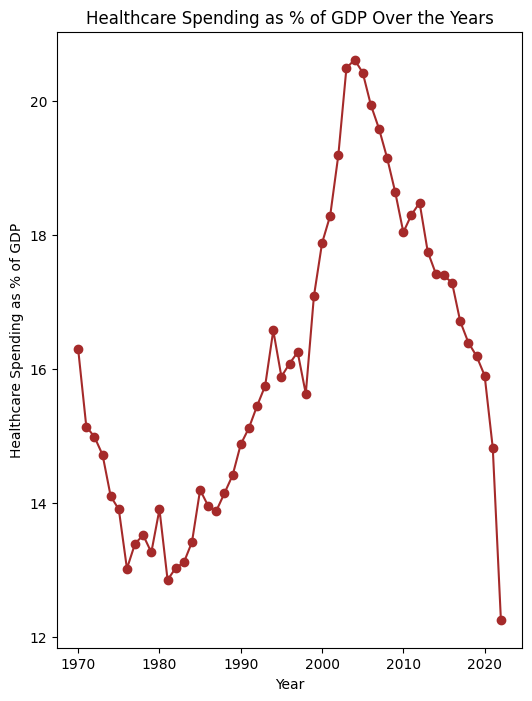

In [7]:
# healthcare spending as the percentage of GDP over the years
healthcare_spending=data.groupby('TIME')['PC_HEALTHXP'].mean().reset_index()
plt.figure(figsize=(6,8))
plt.title('Healthcare Spending as % of GDP Over the Years')
plt.plot(healthcare_spending['TIME'],healthcare_spending['PC_HEALTHXP'],marker='o',linestyle='-',color='brown')
plt.xlabel('Year')
plt.ylabel('Healthcare Spending as % of GDP')
plt.show()

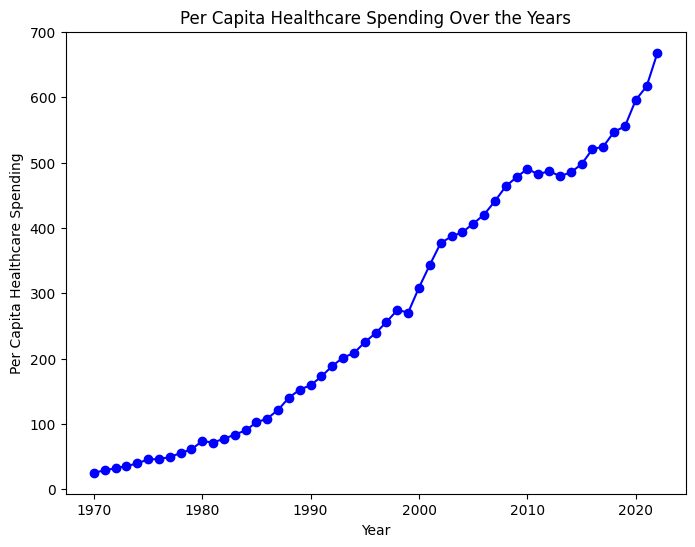

In [8]:
#per capita healthcare spending over the years
per_capita_healthcare=data.groupby('TIME')['USD_CAP'].mean().reset_index()
plt.figure(figsize=(8,6))
plt.title('Per Capita Healthcare Spending Over the Years')
plt.plot(per_capita_healthcare['TIME'],per_capita_healthcare['USD_CAP'],marker='o',linestyle='-',color='blue')
plt.xlabel('Year')
plt.ylabel('Per Capita Healthcare Spending')
plt.show()

#### ii) Country wise analysis


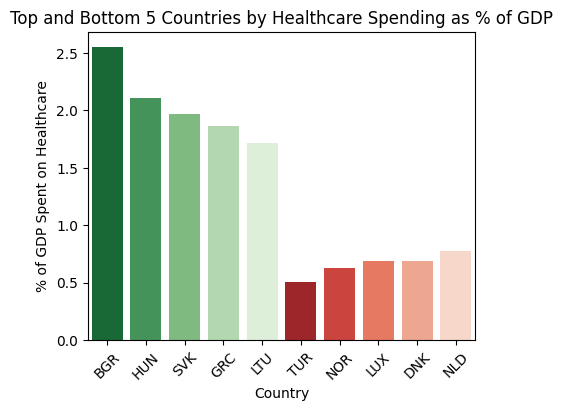

In [9]:
# top coutries with highest healthcare spending as % of GDP
top_countries_byGDP=data.groupby('LOCATION')['PC_GDP'].mean().reset_index()
top_countries_byGDP=top_countries_byGDP.sort_values(by='PC_GDP',ascending=False)

top_5_gdp = top_countries_byGDP.head(5)
bottom_5_gdp = top_countries_byGDP.tail(5).sort_values(by='PC_GDP', ascending=True)

# Plot
plt.figure(figsize=(5,4))
sns.barplot(x='LOCATION', y='PC_GDP', data=top_5_gdp, palette='Greens_r',hue='LOCATION')
sns.barplot(x='LOCATION', y='PC_GDP', data=bottom_5_gdp, palette='Reds_r',hue='LOCATION')
plt.title('Top and Bottom 5 Countries by Healthcare Spending as % of GDP')
plt.xlabel('Country')
plt.ylabel('% of GDP Spent on Healthcare')
plt.xticks(rotation=45)
plt.show()

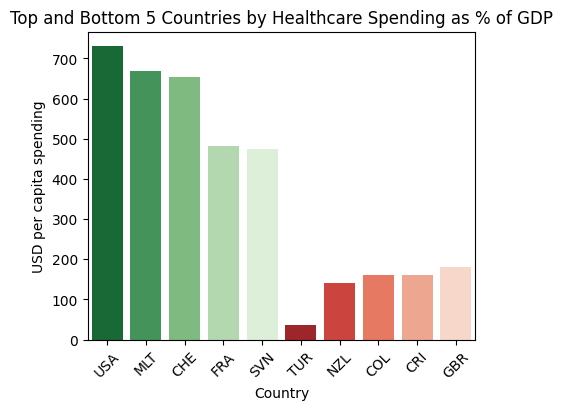

In [10]:
#Top 5 countries with highest per capita healthcare spending
top_countries_per_capita=data.groupby('LOCATION')['USD_CAP'].mean().reset_index()
top_countries_per_capita=top_countries_per_capita.sort_values(by='USD_CAP',ascending=False)
top_5_percapita = top_countries_per_capita.head(5)
bottom_5_percapita = top_countries_per_capita.tail(5).sort_values(by='USD_CAP', ascending=True)

# Plot
plt.figure(figsize=(5,4))
sns.barplot(x='LOCATION', y='USD_CAP', data=top_5_percapita, palette='Greens_r',hue='LOCATION')
sns.barplot(x='LOCATION', y='USD_CAP', data=bottom_5_percapita, palette='Reds_r',hue='LOCATION')
plt.title('Top and Bottom 5 Countries by Healthcare Spending as % of GDP')
plt.xlabel('Country')
plt.ylabel('USD per capita spending')
plt.xticks(rotation=45)
plt.show()

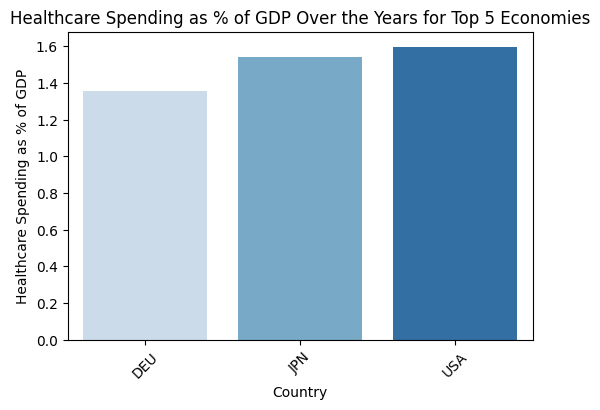

In [25]:
# Comparing top 5 economies of the world: United States, China, Japan, Germany and India
top_5_economies= ['USA','CHN','JPN','DEU','IND']
top_5_economies=data[data['LOCATION'].isin(top_5_economies)]
top_5_economies = top_5_economies.groupby('LOCATION')[['PC_GDP','USD_CAP']].mean().reset_index()
top_5_economies=top_5_economies.dropna()
plt.figure(figsize=(6, 4))
plt.title('Healthcare Spending as % of GDP Over the Years for Top 5 Economies')
sns.barplot(x='LOCATION', y='PC_GDP', data=top_5_economies, palette='Blues',hue='LOCATION')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Healthcare Spending as % of GDP')
plt.show()


### 3) Correlation among numerical values

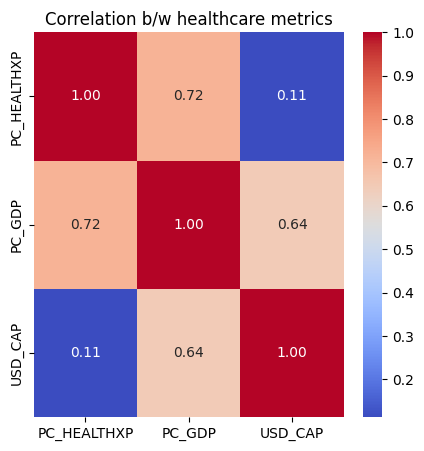

In [12]:
#  Correlation Heatmap
corr_data= data[['PC_HEALTHXP','PC_GDP','USD_CAP']]
corr_matrix= corr_data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation b/w healthcare metrics')
plt.show()

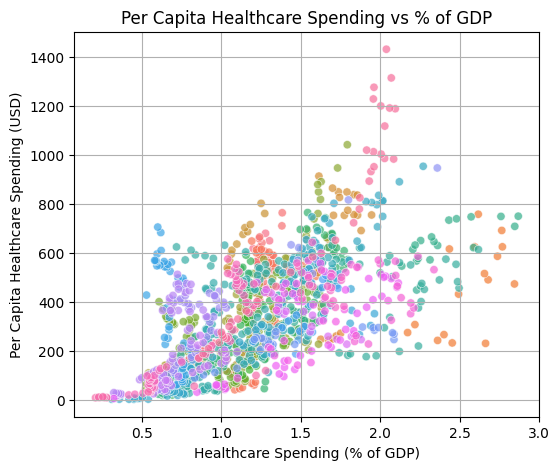

In [15]:
# Scatter plot of per capita healthcare spending vs % of GDP
plt.figure(figsize=(6, 5))
sns.scatterplot(data=data, x='PC_GDP', y='USD_CAP', hue='LOCATION', legend=False, alpha=0.7)
plt.title('Per Capita Healthcare Spending vs % of GDP')
plt.xlabel('Healthcare Spending (% of GDP)')
plt.ylabel('Per Capita Healthcare Spending (USD)')
plt.grid(True)
plt.show()


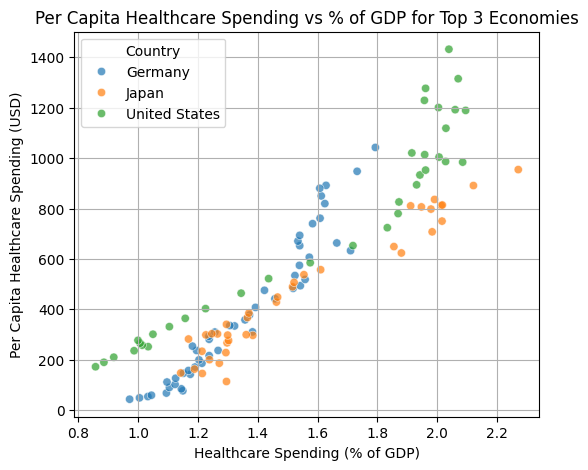

In [ ]:
# Scatter plot of per capita healthcare spending vs % of GDP for top 3 economies
top_3_economies = ['USA', 'DEU', 'JPN']
top_3_economies_data = data[data['LOCATION'].isin(top_3_economies)]
plt.figure(figsize=(6, 5))
top_3_economies_data.loc[:,'LOCATION']= top_3_economies_data['LOCATION'].replace({'USA':'United States','DEU':'Germany','JPN':'Japan'})
sns.scatterplot(data=top_3_economies_data, x='PC_GDP', y='USD_CAP', hue='LOCATION', legend=True, alpha=0.7)
plt.title('Per Capita Healthcare Spending vs % of GDP for Top 3 Economies')
plt.xlabel('Healthcare Spending (% of GDP)')
plt.ylabel('Per Capita Healthcare Spending (USD)')
plt.grid(True)
plt.legend(title='Country')

